<a href="https://colab.research.google.com/github/Seba-Paulsen/Proyecto-Endodoncia/blob/main/Prototipo_Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar Imagen a trabajar

In [ ]:
!git clone https://github.com/Seba-Paulsen/Proyecto-Endodoncia.git
%cd /content/Proyecto-Endodoncia

Cloning into 'Proyecto-Endodoncia'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 8 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (8/8), done.
/content/Proyecto-Endodoncia


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [ ]:
img = cv2.imread("Endodoncia corta.jpg")

In [ ]:
print('La imagen shapes.png tiene dimensiones: ', img.shape )

La imagen shapes.png tiene dimensiones:  (148, 208, 3)


(-0.5, 207.5, 147.5, -0.5)

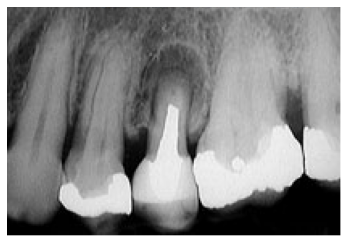

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')

In [ ]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

(-0.5, 207.5, 147.5, -0.5)

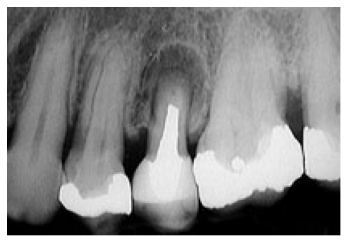

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.imshow(img_rgb)
plt.axis('off')

(-0.5, 207.5, 147.5, -0.5)

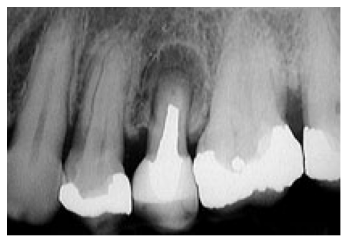

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig = plt.figure(figsize=(6, 6))
plt.imshow(img_gray, cmap='gray')
plt.axis('off')

(array([2993.,  457.,  475.,  636.,  883., 1408., 1603., 1604., 1996.,
        2241., 2848., 1930., 1604., 1759., 1731.,  944.,  760., 1645.,
        1789., 1478.]),
 array([  0.  ,  12.75,  25.5 ,  38.25,  51.  ,  63.75,  76.5 ,  89.25,
        102.  , 114.75, 127.5 , 140.25, 153.  , 165.75, 178.5 , 191.25,
        204.  , 216.75, 229.5 , 242.25, 255.  ]),
 <a list of 20 Patch objects>)

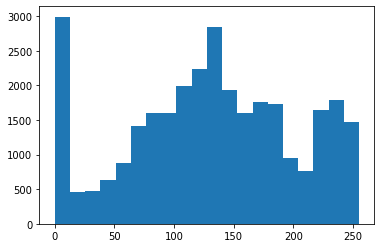

In [ ]:
img_flat = img_gray.flatten()

plt.figure()
plt.hist(img_flat,20)

(-0.5, 207.5, 147.5, -0.5)

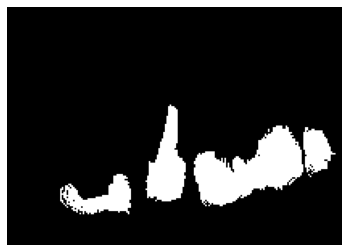

In [ ]:
mask = cv2.inRange(img_gray, 215, 250)/255
mask = np.uint8(mask)

fig = plt.figure(figsize=(6, 6))
plt.imshow(mask, cmap='gray')
plt.axis('off')

In [ ]:
edges = cv2.Canny(mask, 0 , 1)

In [ ]:
dientes, labels = cv2.connectedComponents(mask)

dientes identificadas: 7


(-0.5, 207.5, 147.5, -0.5)

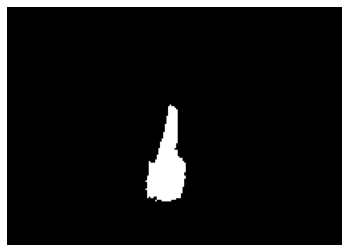

In [ ]:
print('dientes identificadas: {:d}'.format((dientes - 1)))
diente_1= np.uint8(labels==1)
fig = plt.figure(figsize=(6, 6))
plt.imshow(diente_1, cmap='gray')
plt.axis('off')

7
[128, 128, 128, 128, 104, 104, 105, 105, 128, 104, 104, 128, 76, 76, 77, 77, 103, 75, 73, 101, 129, 93, 70, 106, 122, 118, 59, 63]
59
[[107 122]
 [ 84 118]
 [ 94  59]
 [117  63]]


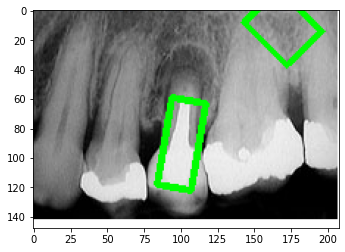

In [ ]:
def dibuja(mask,img):
contours, hierarchy = cv2.findContours(mask,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
Boxes=[]
Boxesy=[]
for c in contours:
    box = cv2.minAreaRect(c)
    points = cv2.boxPoints(box)
    intbox = np.int0(points)
    Boxes.append(intbox)
    #Box = cv2.boxPoints(box)
    #Box = np.int0(box)
    #cv2.drawContours(mask, [box] , -1, (0,255,0), 3)
    #imgplot = plt.imshow(mask)
    
    #box = cv2.minAreaRect(c)
print(len(contours))
for i in range(len(Boxes)):
  for j in range(4):
    Boxesy.append(Boxes[i][j][1])
print(Boxesy)
print(np.min(Boxesy))
indice=Boxesy.index(np.min(Boxesy))
indiceBox=int(indice/4)
print(Boxes[indiceBox])
fig = Boxes[indiceBox]


cv2.drawContours(img, [fig] , -1, (0,255,0), 3)
imgplot = plt.imshow(img)

#rect = cv2.minAreaRect(diente_1)
#box = cv2.cv.BoxPoints(rect) # cv2.boxPoints(rect) for OpenCV 3.x
#box = np.int0(box)
#cv2.drawContours(im,[box],0,(0,0,255),2)